# Trasformate di Fourier

In [1]:
import numpy as np
import pandas as pd
#from scipy import constants, fftpack
from scipy import constants, fft
import matplotlib.pyplot as plt

## Introduzione

Una funzione periodica $f(x)$ definita nell'ntervallo $x \in [0, L[$ può essere espressa come una serie di Fourier:

$$
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos{\left(\frac{2 \pi k x}{L} \right)} + \sum_{k=1}^{\infty} \beta_k \sin{\left( \frac{2 \pi k x}{L} \right)} 
$$

che atraverso le relazioni $\cos{\theta} = \frac{1}{2} (e^{-i\theta} + e^{i\theta})$,  $\sin{\theta} = \frac{1}{2} i (e^{-i\theta} - e^{i\theta})$ può essere riscritta come:

$$
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k e^{i \frac{2 \pi kx}{L}}
$$

dove

$$
\gamma_k = 
\begin{cases}
\begin{eqnarray}
\frac{1}{2} (\alpha_{-k} +i\beta_{-k}) \; &\;&  per \; k < 0 \\
\alpha_0  \;                              &\;&  per \; k = 0 \\
\frac{1}{2} (\alpha_{k} -i\beta_{k}) \;   &\;&  per \; k > 0 \\
\end{eqnarray}\\
\end{cases}
$$

Conoscendo $f(x)$, i coefficienti $\gamma_k$ possono essere ricavati:
$$
\gamma_k = \frac{1}{L} \int_0^L f(x) e^{-i \frac{2 \pi kx}{L}} dx.
$$

## Trasformate di Fourier Discrete 

Le traformate di Fourier Discrete (Discrete Fourier Transform o DFT in inglese) si applicaono quando non è possibile calcolare l'integrale per ricavare i coeffcienti $\gamma_k$.

Definendo $N$ campionamenti di larghezza $h = \frac{L}{N}$ e applicando la regola del trapezio otteniamo una versione numerica dei coeeficienti:

$$
\gamma_k = \frac{1}{L} \frac{L}{N} \left[ \frac{1}{2} f(0) + \frac{1}{2} f(L) + \sum_{n=1}^{N-1} f(x_n) e^{-i \frac{2 \pi kx}{L}} \right]
$$

dove 
$$
x_n = \frac{n}{N} L.
$$

Dato che la f(x) per definizione è periodica $f(L) = f(0)$ e definendo $y_n = f(x_n)$ possiamo esprimere  il tutto con:

$$
\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n e^{-i \frac{2 \pi kn}{N}}
$$

dove la dipendenza da $x_i$ ed  $L$ è scomparsa, sono rimasti solo i campionamenti $y_i$ e il loro numero totale $N$.

Convenzionalemente i coeffcienti della DFT vengono espressi come:

$$
c_k = \sum_{n=0}^{N-1} y_n e^{-i \frac{2 \pi kn}{N}}
$$

per cui $c_k = N \, \gamma_k$.

### Trasformate Discrete di Fourier Inverse

Sebbene siamo partiti da un metodo di integrazione approssimato (trapezio) si può dismostrare che i coefficienti $c_k$ sono esatti, infatti da essi si possono recuperare i campionamenti $y_n$:

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k e^{i \frac{2 \pi kn}{N}}
$$

che corrisponde alla DFT inversa.


Ovviamente le **DFT sono esatte solo per quanto riguarda i valori campionati $y_n$**.  Due funzioni diverse che danno origine alla stessa serie di campionamenti, come nella figura di seguito,  dal punto di vista della  DFT saranno indistinguibili.  

In [2]:
def fun1(x):
    return (x-2)**3 - (x-1)**2 +2

def fun2(x):
    vv = (x-2)**3 - (x-1)**2 +2
    mask  = ( x > 1.4)  &  (x < 1.7)
    vv[mask] =  vv[mask]  +vv[mask] * np.sin( (x[mask]-1.5)*2*constants.pi/0.3)
    
    return vv

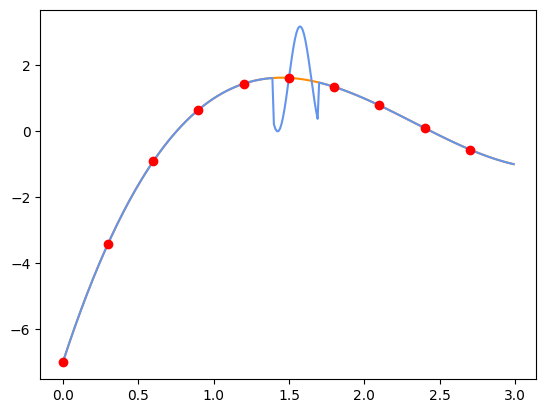

In [3]:
x  = np.arange(0, 3, 0.01)
xs = np.arange(0, 3, 0.3)
plt.plot(x, fun1(x), color='darkorange')
plt.plot(x, fun2(x), color='cornflowerblue')

plt.plot(xs, fun1(xs), 'o', color='red')
plt.show()

### Funzioni Reali

Le definizioni per la DFT diretta ed inversa è valida per funzioni complesse. Nel caso in cui i valori $y_n$ siano reali i calcoli possono essere  ulteriormente semplificati.

Ricordando che il complesso coniugato di $e^{i x}$ è $e^{-ix}$ e viceversa e che $e^{-i 2\pi n} = 1$, si può vedere che:

$$ 
c_{N-r} = \sum_{n=0}^{N-1} y_n e^{-i \frac{2 \pi (N-r)n)}{N}} = 
\sum_{n=0}^{N-1} y_n e^{-i 2 \pi n}  e^{i \frac{2 \pi r n}{N}} =
\sum_{n=0}^{N-1} y_n e^{i \frac{2 \pi r n}{N}} = c_r^*
$$

quindi $c_{N-1} = c_1^*$, $c_{N-2} = c_2^*$ e così via. Ne consegue che è necessario calcolare solo la metà dei coefficienti per $ 0 \leq k \leq \frac{1}{2} N$ e poi prenderne il complesso coniugato.

## Fast Fourier Transform (FFT)

Le DFT, per un campione di dati con $N$ campionamenti, prevedono di calcolare $\frac{1}{2}(N+1)$ coeficienti $c_n$ (nel caso reale) ognuno dei quali corrisponde alla somma di $N$ termini. Ne consegue che il carico computazionale cresca con il  numero di campioni $N$ come $N^2$.

Attraverso il metodo delle Fast Fourier Transform (FFT) è possibile ridurre il carico computazionale e velocizzare il calcolo delle DFT.

Ricordando che i coefficienti $c_k$ della DFT possono essere ricavati attraverso:

$$ 
c_{k} = \sum_{n=0}^{N-1} y_n e^{-i \frac{2 \pi k n}{N}},
$$

consideriamo un numero di campionamenti pari ad una potenza di 2: $N=2^m$.

Essendo $N$ una potenza di due, la somma  per il  calcolo di $c_k$ può essere suddivisa nella somma dei termini pari e quella dei termini dispari.

Possiamo esprimere la somma  dei termini pari considerando   $n=2r$, con $r=0,1,...\frac{1}{2}N-1$, come:

$$
P_k = \sum_{r=0}^{\frac{1}{2}N-1} y_{2r} e^{-i \frac{2 \pi k (2r)}{N}} = \sum_{r=0}^{\frac{1}{2}N-1} y_{2r} e^{-i \frac{2 \pi k r}{N/2}}
$$

che in pratica corrisponde ad una trasformata di Fourier con un numero di campionamenti pari a $\frac{N}{2}$.

Uguamente per i termini dispari possiamo definire   $n=2r+1$, con $r=0,1,...\frac{1}{2}N-1$, e definire la somma:

$$
 \sum_{r=0}^{\frac{1}{2}N-1} y_{2r+1} e^{-i \frac{2 \pi k (2r+1)}{N}} =  e^{-i \frac{2 \pi k }{N}} \sum_{r=0}^{\frac{1}{2}N-1} y_{2r+1} e^{-i \frac{2 \pi k r}{N/2}} = e^{-i \frac{2 \pi k }{N}}  D_k
$$

dove $D_k$ è di nuovo una trasformata di Fourier con un nuero di campioni pari a $\frac{1}{2} N$.

Tornando al coefficiente originale $c_k$ abbiamo:

$$
c_k = P_k + e^{-i \frac{2 \pi k }{N}}  D_k.
$$

Possiamo ripetere questa operazione ed esprimere $P_k$ e $D_k$, che sono trasfornate di Fourier con $\frac{N}{2}$ campioni,  come combinazione dei rispettivi termini pari e dispari.  Ripetendo questa operazione a cascata $m$ volte, essendo $N=2^m$, raggiungiamo il punto in cui ogni sotto campione comprende un unico punto. 

La trasformata di Fourier di un campione con un singolo punto prevede un solo coefficiente:

$$
c_0 = \sum_{n=0}^0 y_0 e^0 = y_0.
$$




Per il calcolo della DFT possiamo quindi invertire il processo e a partire dai campionamneti $y_k$, combinarli a coppie, poi a coppie di coppie e così via, fino a ricostruire la trasformata di Fourier del campione totale.

Il metodo sopra descitto corrisponde allle FFT,
il vantaggio consiste nel fatto che il calcolo finale corrisponde alla somma di $N$ termini per $m=\log_2 N$ livelli, per cui il numero di operazioni rescrea con $N$ come $N \log_2 N $, invece che com $N^2$. 

La stessa procedura può essere applicata alla trasformata inversa.

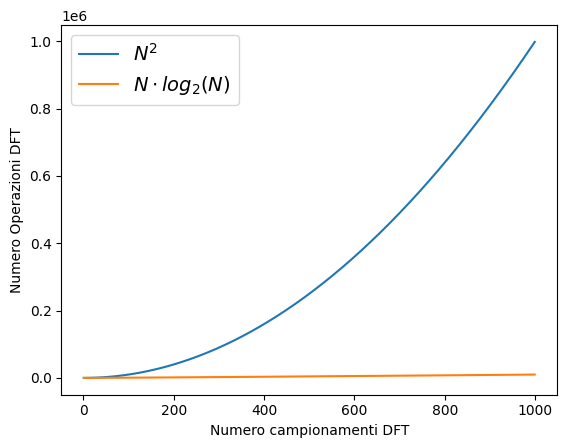

In [4]:
n = np.arange(1, 1e3)

plt.plot(n, n**2, label=r'$N^2$')
plt.plot(n, n*np.log2(n), label=r'$N \cdot log_2(N)$')

plt.xlabel('Numero campionamenti DFT')
plt.ylabel('Numero Operazioni DFT')
plt.legend(fontsize=14)
plt.show()


## Numpy / Scipy FFT

Le FFT sono implementare sia in *numpy* che in *scipy* con funzionalità analoghe.  Il secondo ha metodi più efficienti quindi useremo i moduli `fft` di *scipy*:


* `scipy.fft.fft()` calcola la FFT;
* `scipy.fft.fftfreq()` per generare le frequenze corrispondneti;
* `scipy.fft.ifft()` per calcolare la FFT inversa.



Per campioni solo reali è possibile utilizzare i metodi dedicati e più veloci:
* `scipy.fft.rfft()`
* `scipy.fft.rfftfreq()`
* `scipy.fft.rifft()`


### Esempio
Partiamo dall'esempio di una funzione sinusoidale. 

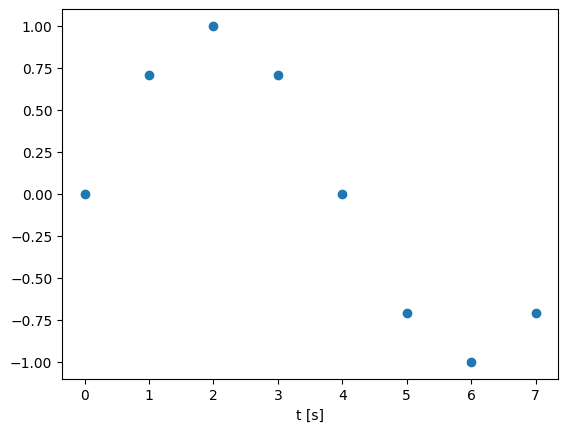

In [5]:
# array x per 8 campionamenti 
ts = np.arange(0, 8)

# funzione seno
fs = np.sin(2*np.pi/8 *ts)

# grafico
plt.plot(ts, fs, 'o')
plt.xlabel('t [s]')
plt.show()

[ 0.     0.125  0.25   0.375 -0.5   -0.375 -0.25  -0.125]


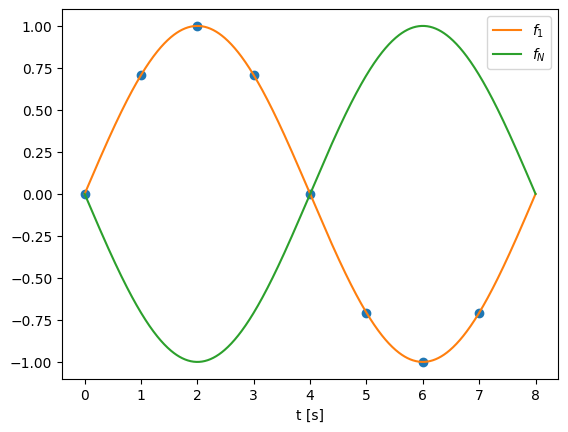

In [6]:
# FFT 
ffts  = fft.fft(fs)
freqs = fft.fftfreq(len(ffts), d=1)  # Calcolo frequenze con delta t d=1

print(freqs)

tfine = np.linspace(0, 8, 800)

plt.plot(ts, fs, 'o')

#plt.plot( tfine, np.sin( 2*np.pi*freqs[1]*tfine) )
#
#for ip in range(1, 6):
#    freq = 1/ip
#    plt.plot( tfine, np.sin( 2*np.pi*freq*tfine) )

#plt.plot( tfine, np.sin( 2*np.pi*freqs[0]*tfine) )
plt.plot( tfine, np.sin( 2*np.pi*freqs[1]*tfine), label=r'$f_1$')

plt.plot( tfine, np.sin( 2*np.pi*freqs[-1]*tfine), label='$f_N$')

plt.xlabel('t [s]')
plt.legend()
plt.show()


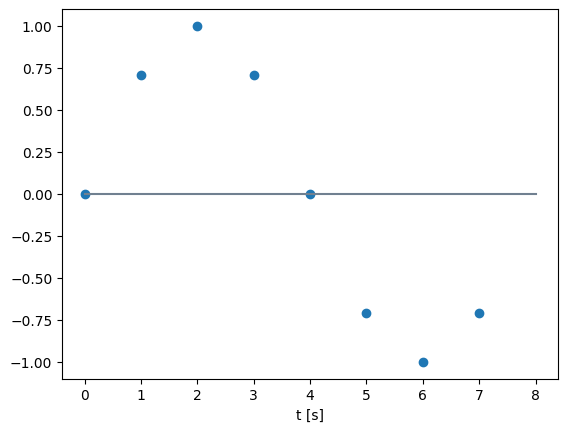

In [7]:
# Frequenza zero
plt.plot(ts, fs, 'o')
plt.plot( tfine, np.sin( 2*np.pi*freqs[0]*tfine), color='slategray' )
plt.xlabel('t [s]')
plt.show()

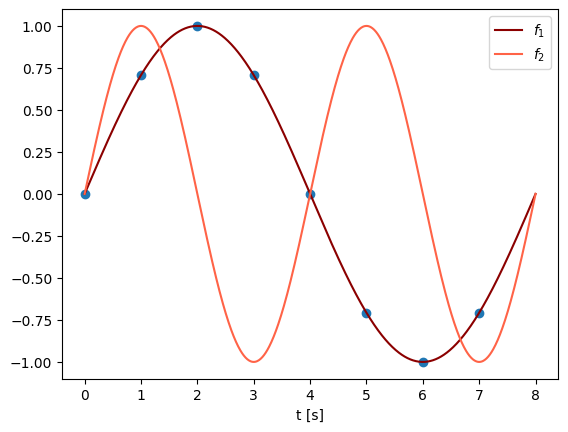

In [8]:
# Frequenza di ordine 1,2
plt.plot(ts, fs, 'o')
plt.plot( tfine, np.sin( 2*np.pi*freqs[1]*tfine) , label='$f_1$',  color='darkred' )
plt.plot( tfine, np.sin( 2*np.pi*freqs[2]*tfine) , label='$f_2$',  color='tomato' )
plt.xlabel('t [s]')
plt.legend()
plt.show()

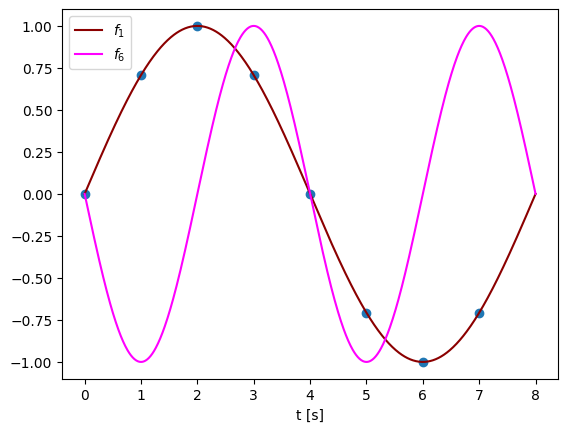

In [9]:
# Frequenza di ordine 1, 6(8-2)
plt.plot(ts, fs, 'o')
plt.plot( tfine, np.sin( 2*np.pi*freqs[1]*tfine) , label='$f_1$', color='darkred' )
plt.plot( tfine, np.sin( 2*np.pi*freqs[6]*tfine) , label='$f_6$', color='magenta' )
plt.xlabel('t [s]')
plt.legend()
plt.show()

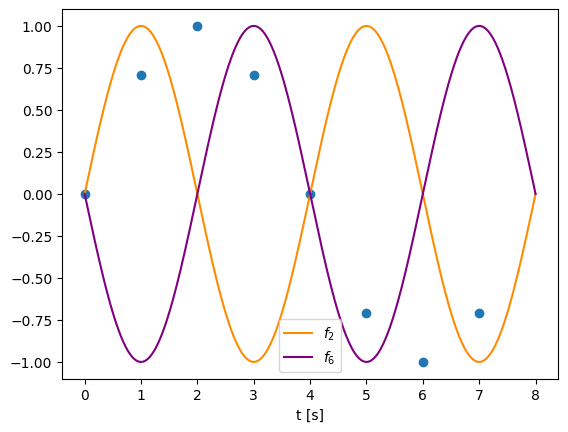

In [10]:
# Frequenza di ordine 2, 6(8-2)
plt.plot(ts, fs, 'o')
plt.plot( tfine, np.sin( 2*np.pi*freqs[2]*tfine) , label='$f_2$', color='darkorange' )
plt.plot( tfine, np.sin( 2*np.pi*freqs[6]*tfine) , label='$f_6$', color='purple' )
plt.xlabel('t [s]')
plt.legend()
plt.show()

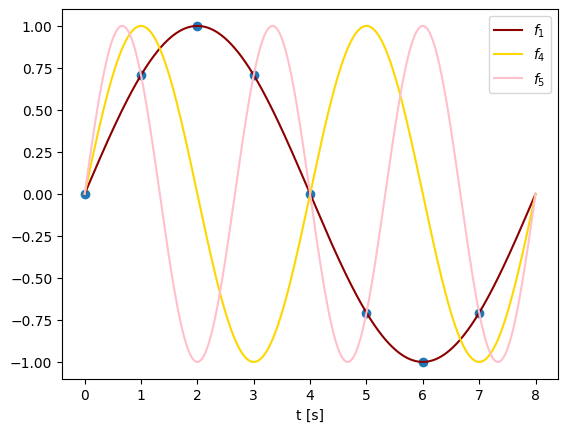

In [11]:
# Frequenza di ordine 1, 2, 3 
plt.plot(ts, fs, 'o')
plt.plot( tfine, np.sin( 2*np.pi*freqs[1]*tfine) , label='$f_1$', color='darkred' )
plt.plot( tfine, np.sin( 2*np.pi*freqs[2]*tfine) , label='$f_4$', color='gold' )
plt.plot( tfine, np.sin( 2*np.pi*freqs[3]*tfine) , label='$f_5$', color='pink' )
plt.xlabel('t [s]')
plt.legend()
plt.show()

In [12]:
t = np.linspace(0, 20, 100)

af  = 0.1 + 2* np.sin(.8*t )
afs =     2* np.sin(.8*t -.5)

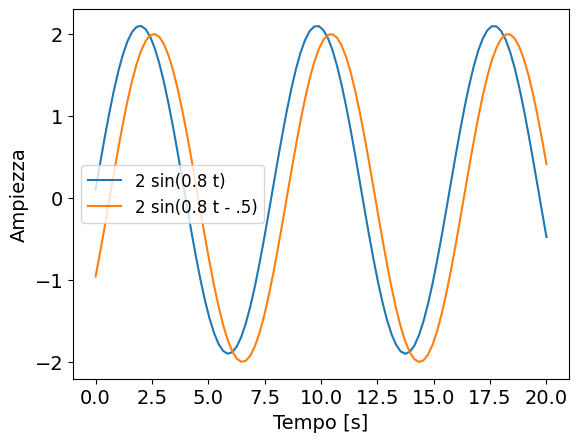

In [13]:
plt.plot(t, af,  label='2 sin(0.8 t)')
plt.plot(t, afs, label='2 sin(0.8 t - .5)')
plt.legend(fontsize=12)
plt.xlabel('Tempo [s]', fontsize=14)
plt.ylabel('Ampiezza',  fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [14]:
dt = t[1]-t[0]       # incremento temporale

gaf  = fft.fft(af)   # FFT di af
gafs = fft.fft(afs)  # FFT di afs

freq  = fft.fftfreq(gaf.size,  d=dt) # frequenze f[i] di g[i]
freqs = fft.fftfreq(gafs.size, d=dt) # frequenze f[i] di g[i]

/home/sg/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


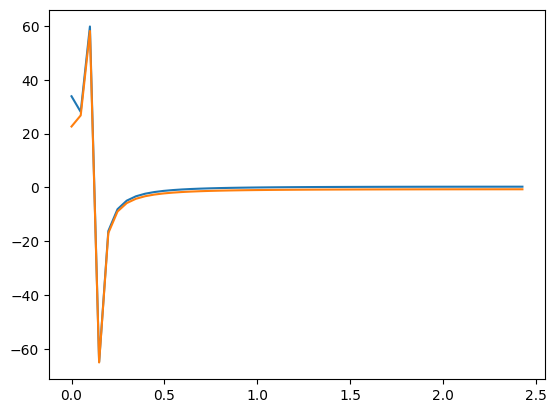

In [15]:
plt.plot(freq[:len(gaf)//2],   gaf[:len(gaf)//2]  )
plt.plot(freqs[:len(gafs)//2], gafs[:len(gafs)//2])
plt.show()

7.853981633974483

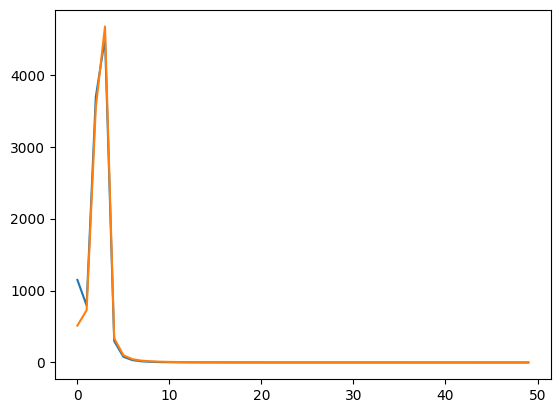

In [16]:
plt.plot(np.absolute(gaf[:len(gaf)//2])**2)
plt.plot(np.absolute(gafs[:len(gafs)//2])**2)


# 2 pi / T = 0.8 --> T = 2 pi / 0.8
2*constants.pi/0.8


In [17]:
#freq = fftpack.fftshift(f)     # shift frequencies from min to max
#gaf  = fftpack.fftshift(gaf)     # shift G order to coorespond to f

#plt.plot(freq, gaf)

#### Esempio con FFT reali (rfft)

[]

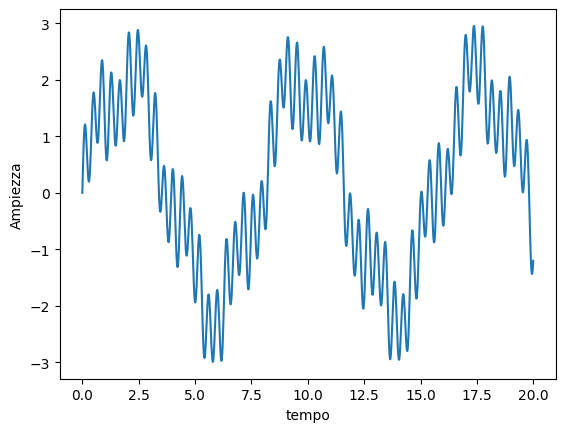

In [18]:
t2 = np.linspace(0, 20, 1000)

af2  = 2* np.sin(.8*t2)+0.5* np.sin(3*t2) + 0.2* np.sin(10*t2) + 0.7* np.sin(16*t2)

plt.plot(t2, af2)
#plt.legend()
plt.xlabel('tempo')
plt.ylabel('Ampiezza')
plt.plot()

In [19]:
nyquist = 0.5 

dt2   = t2[1]-t2[0]

gaf2  = fft.rfft(af2)
freq2 = nyquist*fft.rfftfreq(gaf2.size, d=dt2)

Text(0, 0.5, '$\\left| c_k \\right|^2$')

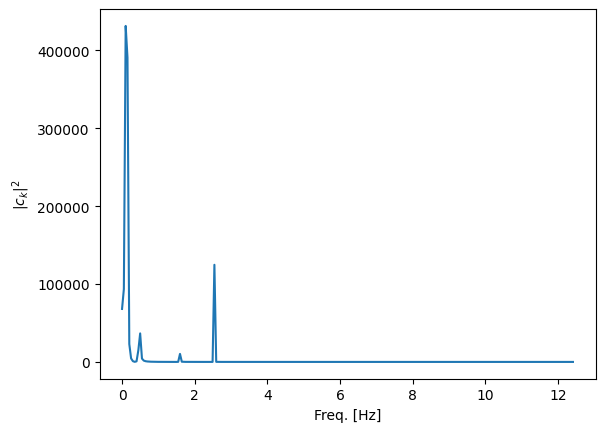

In [20]:
plt.plot(freq2[:len(gaf2)//2], np.absolute(gaf2[:len(gaf2)//2])**2)
plt.xlabel('Freq. [Hz]')
plt.ylabel(r'$\left| c_k \right|^2$')

[]

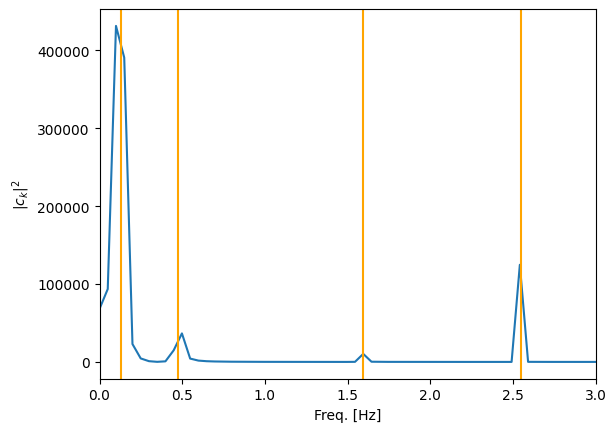

In [21]:
plt.plot(freq2[:len(gaf2)//2], np.absolute(gaf2[:len(gaf2)//2])**2)
plt.axvline( 0.8/(2*np.pi),  color='orange')
plt.axvline( 3  /(2*np.pi),  color='orange')
plt.axvline(10  /(2*np.pi),  color='orange')
plt.axvline(16  /(2*np.pi),  color='orange')
plt.xlim(0, 3)
plt.xlabel('Freq. [Hz]')
plt.ylabel(r'$\left| c_k \right|^2$')
plt.plot()

[]

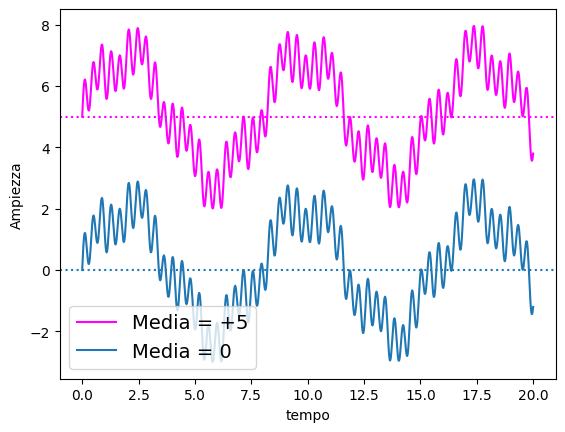

In [22]:
# Funzione con media diversa da zero
af2m5  = 5+ 2* np.sin(.8*t2)+0.5* np.sin(3*t2) + +0.2* np.sin(10*t2) + + 0.7* np.sin(16*t2)

plt.plot(t2, af2m5, color='magenta', label='Media = +5')
plt.plot(t2, af2,                    label='Media = 0' )

plt.axhline(5, linestyle=':', color='magenta')
plt.axhline(0, linestyle=':')
plt.legend(fontsize=14)
plt.xlabel('tempo')
plt.ylabel('Ampiezza')
plt.plot()

[]

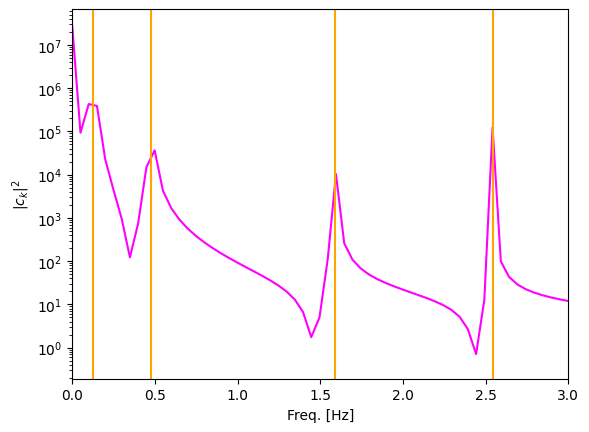

In [23]:
gaf2m5  = fft.rfft(af2m5)
freq2m5 = nyquist*fft.rfftfreq(gaf2m5.size, d=dt2)


plt.plot(freq2m5[:len(gaf2m5)//2], np.absolute(gaf2m5[:len(gaf2m5)//2])**2, color='magenta')
plt.axvline( 0.8/(2*np.pi),  color='orange')
plt.axvline( 3  /(2*np.pi),  color='orange')
plt.axvline(10  /(2*np.pi),  color='orange')
plt.axvline(16  /(2*np.pi),  color='orange')
plt.xlabel('Freq. [Hz]')
plt.ylabel(r'$\left| c_k \right|^2$')
plt.xlim(0, 3)
plt.yscale('log')
plt.plot()

[]

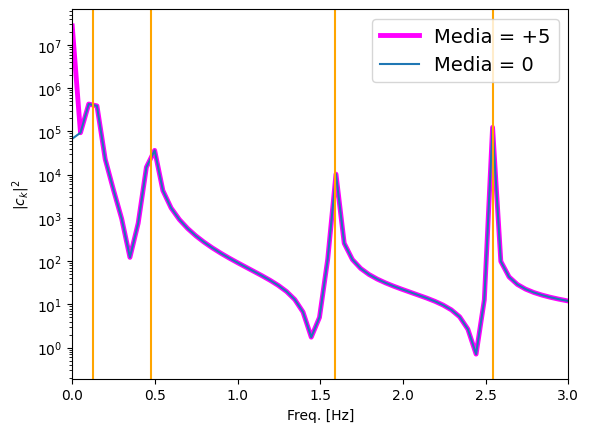

In [24]:
plt.plot(freq2m5[:len(gaf2m5)//2], np.absolute(gaf2m5[:len(gaf2m5)//2])**2, color='magenta', linewidth=3.5, label='Media = +5')
plt.plot(freq2[:len(gaf2)//2], np.absolute(gaf2[:len(gaf2)//2])**2, label='Media = 0')
plt.axvline( 0.8/(2*np.pi),  color='orange')
plt.axvline( 3  /(2*np.pi),  color='orange')
plt.axvline(10  /(2*np.pi),  color='orange')
plt.axvline(16  /(2*np.pi),  color='orange')
plt.xlabel('Freq. [Hz]')
plt.ylabel(r'$\left| c_k \right|^2$')
plt.legend(fontsize=14)
plt.xlim(0, 3)
plt.yscale('log')
plt.plot()

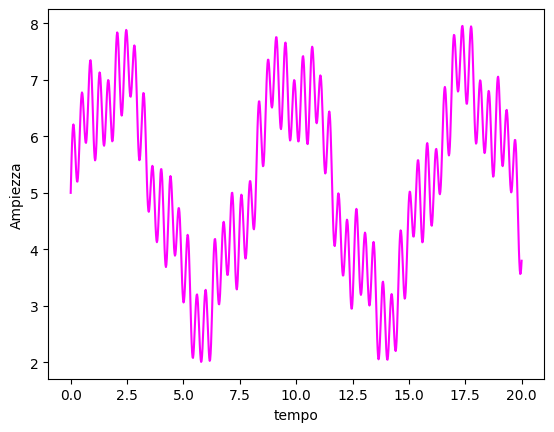

In [25]:
igaf2m5 = fft.irfft(gaf2m5,  n=len(t2))


plt.plot(t2, igaf2m5, color='magenta')
plt.xlabel('tempo')
plt.ylabel('Ampiezza')
plt.show()

/tmp/ipykernel_330285/1545550287.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  gaf2m5_cut0[0] = gaf2m5[0]


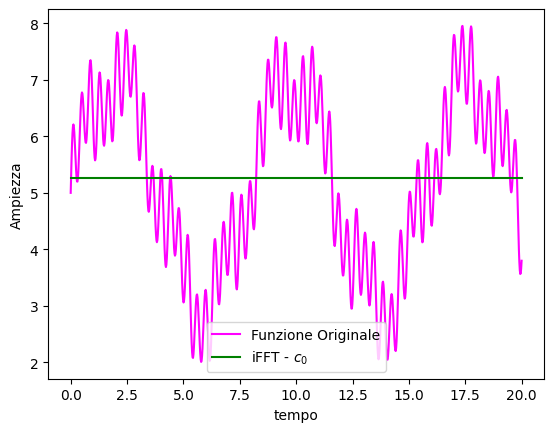

In [26]:
gaf2m5_cut0 = np.zeros(gaf2m5.size)

gaf2m5_cut0[0] = gaf2m5[0]
igaf2m5_cut0 = fft.irfft(gaf2m5_cut0,  n=len(t2))

plt.plot(t2, af2m5, color='magenta', label='Funzione Originale')
plt.plot(t2, igaf2m5_cut0, color='green', label='iFFT - $c_0$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('Ampiezza')
plt.show()

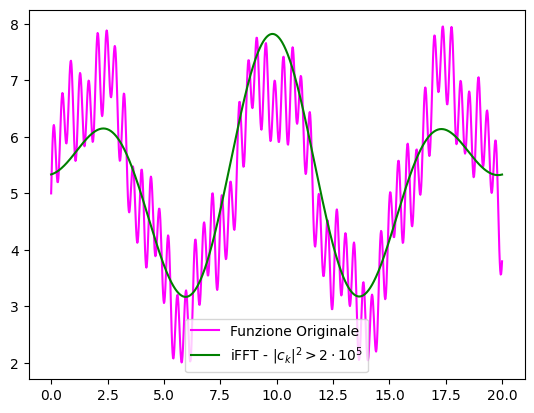

In [27]:
gaf2m5_cut1 = gaf2m5.copy()
mask2m5 = np.absolute(gaf2m5)**2 < 2e5

gaf2m5_cut1[mask2m5] = 0
igaf2m5_cut1 = fft.irfft(gaf2m5_cut1,  n=len(t2))
plt.plot(t2, af2m5,        color='magenta', label='Funzione Originale')
plt.plot(t2, igaf2m5_cut1, color='green', label='iFFT - $|c_k|^2>2\cdot 10^5$')
plt.legend()
plt.show()

#### Esempio con FFT complesse (fft) e riordinamento delle frequenze (fftshift)

In [28]:
width = 2.0
freq  = 0.5

t = np.linspace(-10, 10, 101)   # linearly space time array
g = np.exp(-np.abs(t)/width) * np.sin(2.0*np.pi*freq*t)

dt = t[1]-t[0]       # increment between times in time array

G = fft.fft(g)                # FFT of g
f = fft.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]


print('Before:', f,'\n')    # frequencies before shift

f = fft.fftshift(f)    # shift frequencies from min to max
G = fft.fftshift(G)    # shift G order to coorespond to frequencies f

print('After:', f)     # frequencies after shift


plt.show()

Before: [ 0.          0.04950495  0.0990099   0.14851485  0.1980198   0.24752475
  0.2970297   0.34653465  0.3960396   0.44554455  0.4950495   0.54455446
  0.59405941  0.64356436  0.69306931  0.74257426  0.79207921  0.84158416
  0.89108911  0.94059406  0.99009901  1.03960396  1.08910891  1.13861386
  1.18811881  1.23762376  1.28712871  1.33663366  1.38613861  1.43564356
  1.48514851  1.53465347  1.58415842  1.63366337  1.68316832  1.73267327
  1.78217822  1.83168317  1.88118812  1.93069307  1.98019802  2.02970297
  2.07920792  2.12871287  2.17821782  2.22772277  2.27722772  2.32673267
  2.37623762  2.42574257  2.47524752 -2.47524752 -2.42574257 -2.37623762
 -2.32673267 -2.27722772 -2.22772277 -2.17821782 -2.12871287 -2.07920792
 -2.02970297 -1.98019802 -1.93069307 -1.88118812 -1.83168317 -1.78217822
 -1.73267327 -1.68316832 -1.63366337 -1.58415842 -1.53465347 -1.48514851
 -1.43564356 -1.38613861 -1.33663366 -1.28712871 -1.23762376 -1.18811881
 -1.13861386 -1.08910891 -1.03960396 -0.990

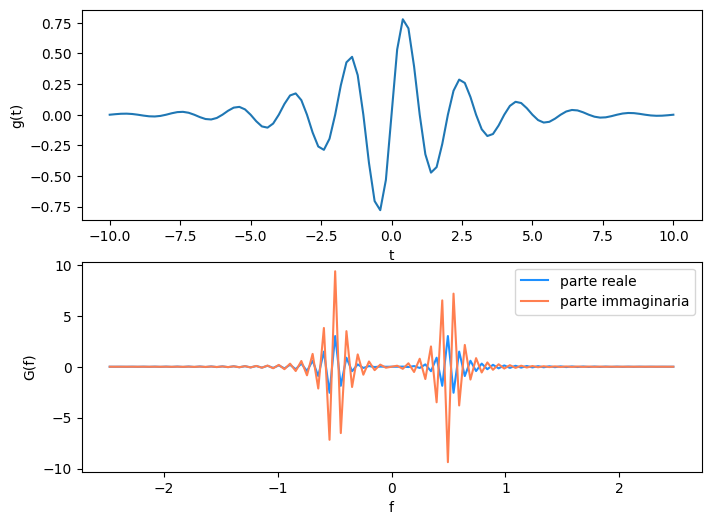

In [29]:
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')

ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='parte reale')
ax2.plot(f, np.imag(G), color='coral', label='parte immaginaria')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')

plt.show()

### Macchie Solari

In [30]:
## Monthly averages of the daily sunspot number with error estimates 
##   as posted at the WDC-SILSO, Royal Observatory of Belgium, Brussels
## downloaded from https://www.sidc.be/SILSO/datafiles

dfsun = pd.read_csv('../../dati/trasformate_fourier/SN_m_tot_V2.0.csv', sep=';')

In [31]:
dfsun

,year,month,year_fraction,sunspots,stdev,observations,definitive
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3305,2024,6,2024.455,164.1,21.4,1186,1
3306,2024,7,2024.540,196.5,23.3,1044,0
3307,2024,8,2024.624,215.5,24.8,1110,0
3308,2024,9,2024.706,141.4,19.4,911,0


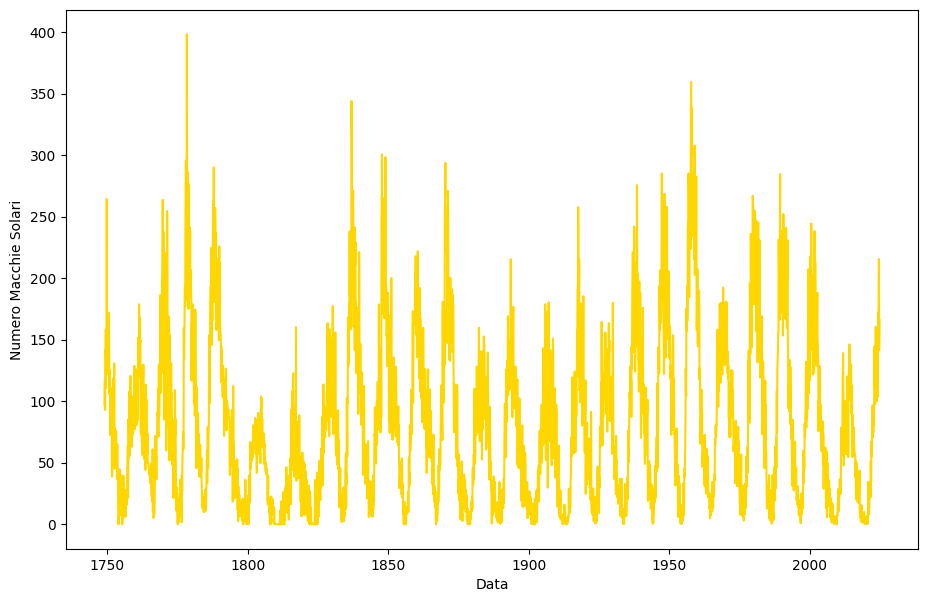

In [32]:
# Grafico dati macchie solari
plt.subplots(figsize=(11,7))
plt.plot(dfsun['year_fraction'], dfsun['sunspots'], color='gold')
plt.xlabel('Data')
plt.ylabel('Numero Macchie Solari')
plt.show()

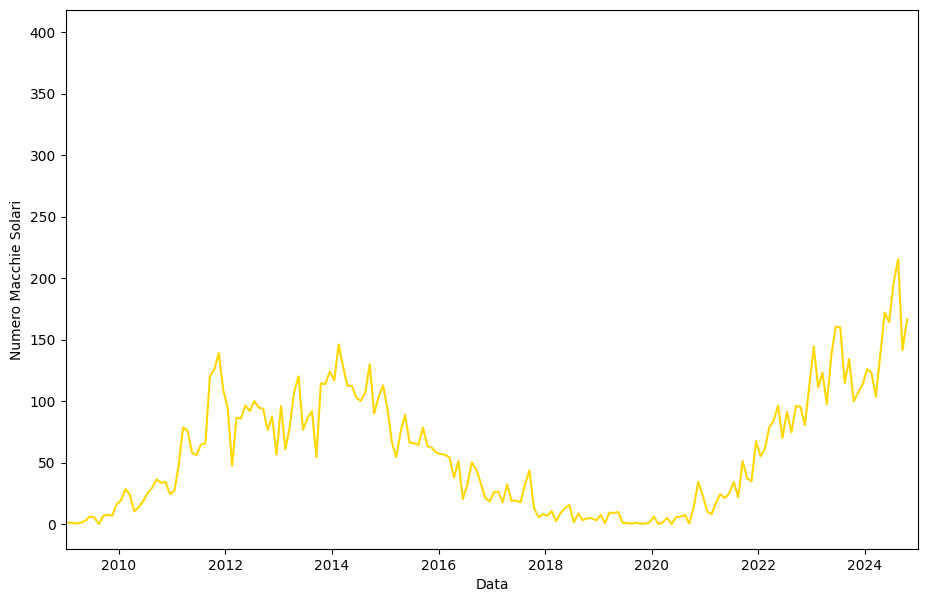

In [33]:
# Zoom su uno dei massimi
plt.subplots(figsize=(11,7))
plt.plot(dfsun['year_fraction'], dfsun['sunspots'], color='gold')
plt.xlabel('Data')
plt.ylabel('Numero Macchie Solari')
plt.xlim(2009,2025)
plt.show()

In [34]:
csun = fft.rfft(dfsun['sunspots'].values)   # real FFT 
#csun = fft.fft(dfsun['sunspots'].values)   # FFT
csun

array([271399.2           +0.j        ,   7346.43728984+16044.7043187j ,
       -10586.57851991+13461.71215593j, ...,
         1601.13658749  +925.56963498j,   1095.65360819   +61.00110291j,
        -1392.            +0.j        ])

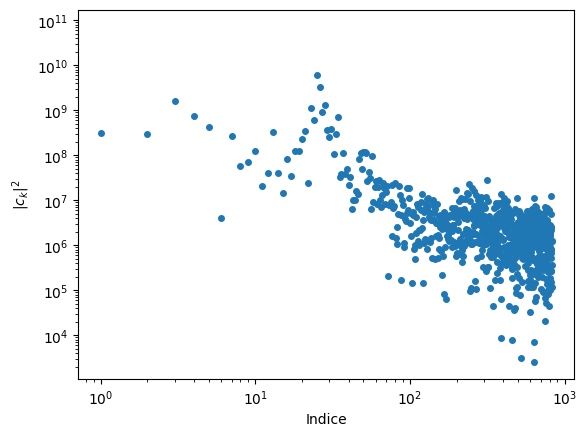

In [35]:
# Grafico spettro di potenza 
plt.plot(np.absolute(csun[:csun.size//2])**2, 'o', markersize=4)
plt.xlabel('Indice')
plt.ylabel(r'$|c_k|^2$')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [36]:
# esprimo la differenza temporale fra le misure in frazione di anni (1 mese=1/12 anno)
sundt = 1/12


# Recupero frequenze
snyquist = 0.5
sunf = snyquist*fft.rfftfreq(csun.size, d=sundt) # frequenies  for rfft (real fft) 

print(sunf)

[0.         0.00362319 0.00724638 0.01086957 0.01449275 0.01811594
 0.02173913 0.02536232 0.02898551 0.0326087  0.03623188 0.03985507
 0.04347826 0.04710145 0.05072464 0.05434783 0.05797101 0.0615942
 0.06521739 0.06884058 0.07246377 0.07608696 0.07971014 0.08333333
 0.08695652 0.09057971 0.0942029  0.09782609 0.10144928 0.10507246
 0.10869565 0.11231884 0.11594203 0.11956522 0.12318841 0.12681159
 0.13043478 0.13405797 0.13768116 0.14130435 0.14492754 0.14855072
 0.15217391 0.1557971  0.15942029 0.16304348 0.16666667 0.17028986
 0.17391304 0.17753623 0.18115942 0.18478261 0.1884058  0.19202899
 0.19565217 0.19927536 0.20289855 0.20652174 0.21014493 0.21376812
 0.2173913  0.22101449 0.22463768 0.22826087 0.23188406 0.23550725
 0.23913043 0.24275362 0.24637681 0.25       0.25362319 0.25724638
 0.26086957 0.26449275 0.26811594 0.27173913 0.27536232 0.27898551
 0.2826087  0.28623188 0.28985507 0.29347826 0.29710145 0.30072464
 0.30434783 0.30797101 0.3115942  0.31521739 0.31884058 0.32246

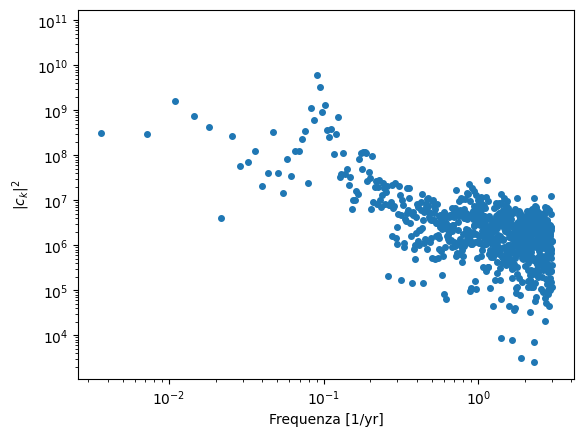

In [37]:
# Grafico spetto di potenza in funzione delle frequenze
plt.plot(sunf[:int(csun.size/2)], np.absolute(csun[:int(csun.size/2)])**2, 'o', markersize=4)
plt.xlabel('Frequenza [1/yr]')
plt.ylabel(r'$|c_k|^2$')
plt.xscale('log')
plt.yscale('log')
plt.show()

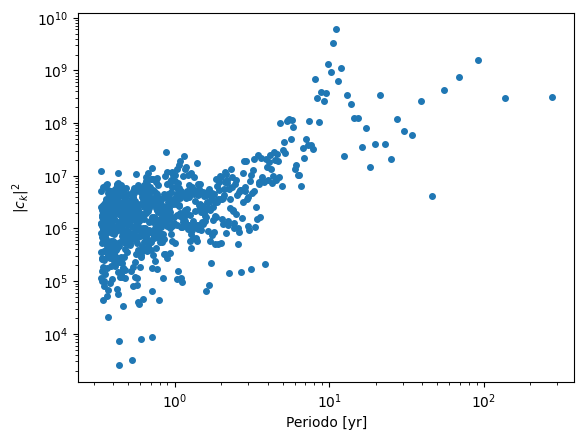

In [38]:
# Grafico spettrodi potenza in funzione del periodo (1/freq)
plt.plot(1/sunf[1:int(csun.size/2)], np.absolute(csun[1:int(csun.size/2)])**2, 'o', markersize=4)
plt.xlabel('Periodo [yr]')
plt.ylabel(r'$|c_k|^2$')
plt.xscale('log')
plt.yscale('log')
plt.show()

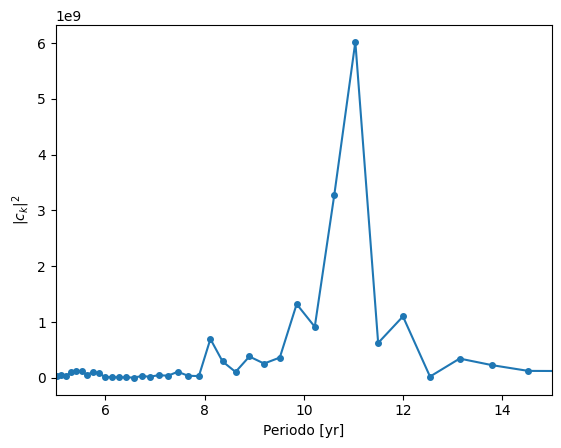

In [39]:
# Zoom spettro di potenza in funzine del periodo
plt.plot(1/sunf[1:csun.size//2], np.absolute(csun[1:csun.size//2])**2, 'o-', markersize=4)
plt.xlabel('Periodo [yr]')
plt.ylabel(r'$|c_k|^2$')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(5, 15)
plt.show()

In [40]:
# Applico maschera per filtrare frequenze meno imporatanti sulla base del PS
fftmask1 = np.absolute(csun)**2< 2e7
fftmask2 = np.absolute(csun)**2< 1e7

# deep copy di csun
filtered_csun1 = csun.copy()
filtered_csun1[fftmask1] = 0

# deep copy di csun
filtered_csun2 = csun.copy()
filtered_csun2[fftmask2] = 0

# Trasformata FFT inversa con coefficienti filtrati 
filtered_sun1 = fft.irfft(filtered_csun1, n=len(dfsun['sunspots']))
filtered_sun2 = fft.irfft(filtered_csun2, n=len(dfsun['sunspots']))
#filtered_sun1 = fft.ifft(filtered_csun1.astype(float))  
#filtered_sun2 = fft.ifft(filtered_csun2.astype(float))

print(len(dfsun['sunspots']), csun.size, filtered_sun1.size)

3310 1656 3310


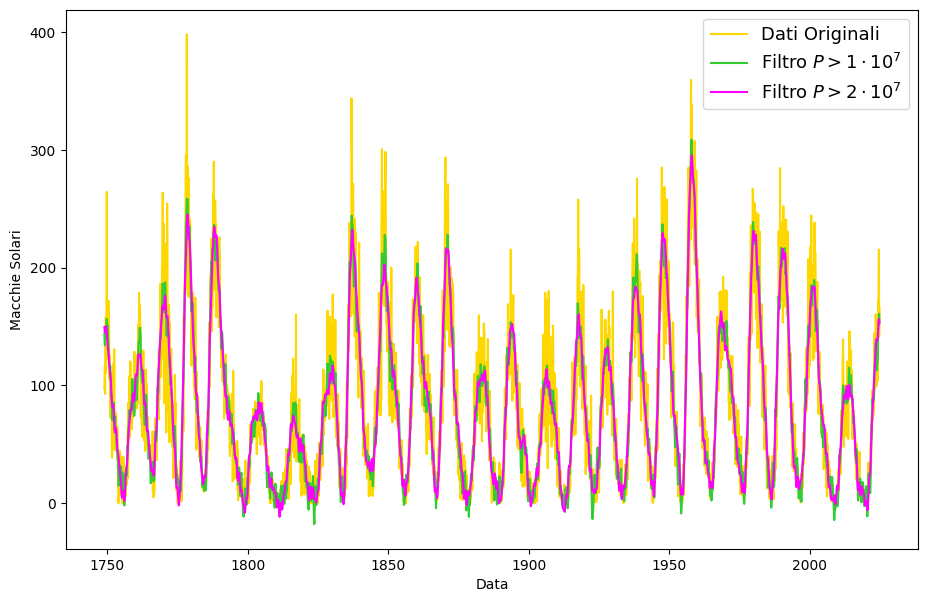

In [41]:
# Grafico dati originali e filtrati
plt.subplots(figsize=(11,7))
plt.plot(dfsun['year_fraction'], dfsun['sunspots'], color='gold',      label='Dati Originali')
plt.plot(dfsun['year_fraction'], filtered_sun2,     color='limegreen', label='Filtro $P>1\cdot 10^7$')
plt.plot(dfsun['year_fraction'], filtered_sun1,     color='magenta',   label='Filtro $P>2\cdot 10^7$')
plt.legend(fontsize=13)
plt.xlabel('Data')
plt.ylabel('Macchie Solari')
plt.show()

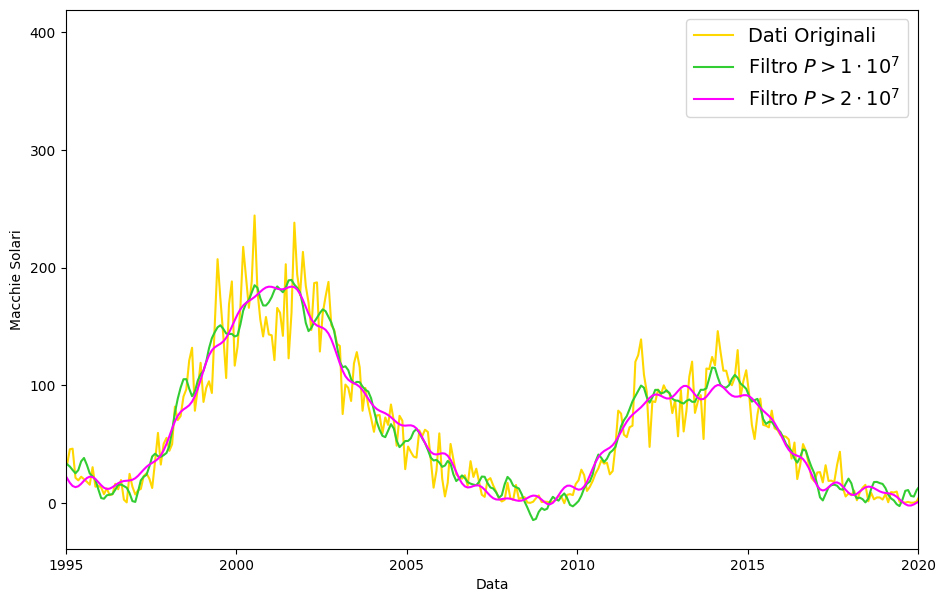

In [42]:
# Zooom grafico dati originali e filtrati
plt.subplots(figsize=(11,7))
plt.plot(dfsun['year_fraction'], dfsun['sunspots'], color='gold',      label='Dati Originali')
plt.plot(dfsun['year_fraction'], filtered_sun2,     color='limegreen', label='Filtro $P>1\cdot 10^7$')
plt.plot(dfsun['year_fraction'], filtered_sun1,     color='magenta',   label='Filtro $P>2\cdot 10^7$')
plt.legend(fontsize=14)
plt.xlabel('Data')
plt.ylabel('Macchie Solari')
plt.xlim(1995, 2020)
plt.show()